In [1]:
# LSTM -> Long Short-Term Memory Network
# example of RNN -> recurrent neural network

# source of some code.
# https://www.simplilearn.com/tutorials/deep-learning-tutorial/rnn

In [2]:
import pickle
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [3]:
# data taken in my personal project from Binance exchange via binance API.

# 10000 1DAY candles  for BTC-USDT, last occuring at 20/1/2023
df = pd.read_pickle(Path(f'data/BTCUSDT-1440m.pickle'))

In [4]:
df

,open_time,open_price,high_price,low_price,close_price,volume,close_time,quote_asset_volume,num_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,symbol
0,1567900800000,10000,10412.65,10000,10391.63,3096.291,1567987199999,32096280.44997,3754,0.039,393.35627,0,BTCUSDT
1,1567987200000,10316.62,10475.54,10077.22,10307,14824.373,1568073599999,152447209.57153,11296,5452.451,56197395.22191,0,BTCUSDT
2,1568073600000,10307,10382.97,9940.87,10102.02,9068.955,1568159999999,92717645.17470,10089,6395.462,65526356.95107,0,BTCUSDT
3,1568160000000,10094.27,10293.11,9884.31,10159.55,10897.922,1568246399999,109786235.83974,13811,7724.442,77841159.69945,0,BTCUSDT
4,1568246400000,10163.06,10450.13,10042.12,10415.13,15609.634,1568332799999,159494237.43414,20060,10117.798,103160660.48429,0,BTCUSDT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,1673827200000,20882.70,21498.00,20606.60,21188.30,666148.201,1673913599999,14032617401.17082,4013906,333915.315,7036062363.27304,0,BTCUSDT
1227,1673913600000,21188.20,21640.00,20827.80,21130.90,547390.593,1673999999999,11615613152.77241,3216496,275473.368,5847336700.47464,0,BTCUSDT
1228,1674000000000,21130.80,21672.00,20386.00,20680.00,813785.517,1674086399999,17129538788.44014,4880532,405610.780,8540377443.09691,0,BTCUSDT
1229,1674086400000,20680.10,21183.90,20659.90,21068.30,374733.617,1674172799999,7822342459.57356,2261529,189723.812,3961007029.48296,0,BTCUSDT


In [5]:
# preprocessing
df = df.drop(columns=['open_time', 'ignore', 'symbol', 'close_time'])
df = df.astype(float)

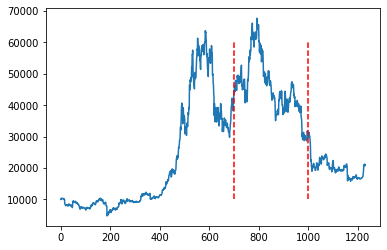

In [6]:
plt.plot(df.index,df['open_price'])
plt.plot([700,700],[10000, 60000],'r--')
plt.plot([1000,1000],[10000, 60000],'r--')

In [7]:
training_set = df.iloc[:,0:1].values
training_set_scaled = MinMaxScaler().fit_transform(training_set)

# 700 days
testing_set_scaled = training_set_scaled[700:1000]

# 300 days
training_set_scaled = training_set_scaled[:700]

training_set_scaled

array([[0.08334389],
       [0.08838202],
       [0.08822895],
       [0.08484394],
       [0.08593854],
       [0.08994683],
       [0.08880195],
       [0.08865015],
       [0.08814939],
       [0.08743811],
       [0.08626967],
       [0.08580551],
       [0.08728535],
       [0.08599423],
       [0.08322773],
       [0.0837845 ],
       [0.06239064],
       [0.05936923],
       [0.05833222],
       [0.05250564],
       [0.05435591],
       [0.05468593],
       [0.05218898],
       [0.05605932],
       [0.05613395],
       [0.05714278],
       [0.0550193 ],
       [0.05358799],
       [0.05346085],
       [0.04914863],
       [0.05451965],
       [0.05419791],
       [0.06042659],
       [0.06038252],
       [0.05558561],
       [0.056298  ],
       [0.0558846 ],
       [0.05702997],
       [0.05407411],
       [0.05143602],
       [0.05262387],
       [0.05065329],
       [0.05068846],
       [0.05499193],
       [0.05471776],
       [0.05184846],
       [0.04300921],
       [0.042

In [8]:
# create data structure: 60 timesteps, and 1 output.
TS = 60

X_train, y_train = [], []
for i in range(len(training_set_scaled)-TS):
    X_train.append(training_set_scaled[i:i+TS,0])
    y_train.append(training_set_scaled[i+TS,0])

X_train, y_train = np.array(X_train), np.array(y_train)

# reshape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
X_train

array([[[0.08334389],
        [0.08838202],
        [0.08822895],
        ...,
        [0.07058004],
        [0.07372446],
        [0.07241377]],

       [[0.08838202],
        [0.08822895],
        [0.08484394],
        ...,
        [0.07372446],
        [0.07241377],
        [0.07291007]],

       [[0.08822895],
        [0.08484394],
        [0.08593854],
        ...,
        [0.07241377],
        [0.07291007],
        [0.07095827]],

       ...,

       [[0.48907322],
        [0.49390704],
        [0.45809271],
        ...,
        [0.55827319],
        [0.5471456 ],
        [0.53209039]],

       [[0.49390704],
        [0.45809271],
        [0.45525413],
        ...,
        [0.5471456 ],
        [0.53209039],
        [0.5564358 ]],

       [[0.45809271],
        [0.45525413],
        [0.5188619 ],
        ...,
        [0.53209039],
        [0.5564358 ],
        [0.57475207]]])

In [10]:
y_train

array([0.07291007, 0.07095827, 0.06386093, 0.064429  , 0.06808898,
       0.06313359, 0.06453466, 0.06384789, 0.06174254, 0.05905066,
       0.05933517, 0.05954124, 0.05443611, 0.05360581, 0.05302422,
       0.04550282, 0.03977441, 0.04047932, 0.03401227, 0.03725152,
       0.03799351, 0.04367116, 0.04224256, 0.04733814, 0.04421695,
       0.0417811 , 0.04024939, 0.04023523, 0.03862125, 0.04172796,
       0.0438995 , 0.04335944, 0.0436885 , 0.04098867, 0.03912248,
       0.03889749, 0.0386954 , 0.03963263, 0.03657446, 0.03744422,
       0.0338167 , 0.02954395, 0.04003251, 0.03793495, 0.03854121,
       0.03769197, 0.04360974, 0.04060407, 0.03961019, 0.03881617,
       0.03875523, 0.03955975, 0.04054456, 0.04171236, 0.03943882,
       0.03862141, 0.03875093, 0.0350079 , 0.04104277, 0.04118503,
       0.04124581, 0.0476645 , 0.05392055, 0.05247047, 0.04862194,
       0.05481641, 0.05184687, 0.05448258, 0.05331732, 0.064647  ,
       0.06465257, 0.06305562, 0.06613845, 0.06623822, 0.06275

In [11]:
# RNN netowrk
regressor= Sequential()

In [12]:
# Add the LSTM layers and some dropout regularization
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [14]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(Dense(units=1))

In [17]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
# fit the RNN
train_results = regressor.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
20/20 [==============================] - 6s 53ms/step - loss: 0.0403
Epoch 2/20
20/20 [==============================] - 1s 57ms/step - loss: 0.0080
Epoch 3/20
20/20 [==============================] - 1s 58ms/step - loss: 0.0063
Epoch 4/20
20/20 [==============================] - 1s 55ms/step - loss: 0.0060
Epoch 5/20
20/20 [==============================] - 1s 50ms/step - loss: 0.0054
Epoch 6/20
20/20 [==============================] - 1s 52ms/step - loss: 0.0059
Epoch 7/20
20/20 [==============================] - 1s 51ms/step - loss: 0.0052
Epoch 8/20
20/20 [==============================] - 1s 53ms/step - loss: 0.0047
Epoch 9/20
20/20 [==============================] - 1s 58ms/step - loss: 0.0044
Epoch 10/20
20/20 [==============================] - 1s 59ms/step - loss: 0.0039
Epoch 11/20
20/20 [==============================] - 1s 52ms/step - loss: 0.0047
Epoch 12/20
20/20 [==============================] - 1s 54ms/step - loss: 0.0043
Epoch 13/20
20/20 [==================

In [19]:
# test for different data interval
# create data structure: 60 timesteps, and 1 output.
TS = 60

X_test, y_test = [], []
for i in range(len(testing_set_scaled)-TS):
    X_test.append(testing_set_scaled[i:i+TS,0])

X_test= np.array(X_test)
# reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [20]:
predicted_price = regressor.predict(X_test)

8/8 [==============================] - 2s 21ms/step


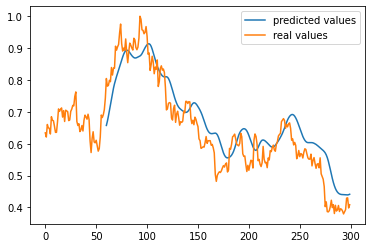

In [21]:
plt.plot(range(60, 300), predicted_price, label='predicted values')
plt.plot(range(300), testing_set_scaled, label='real values')
plt.legend()
plt.show()

In [22]:
# now check with moving average MA(5)
ma_check = pd.DataFrame(testing_set_scaled)
ma_check['MA(5)'] = ma_check.rolling(5).mean()
ma_check

,0,MA(5)
0,0.633925,NaN
1,0.620982,NaN
2,0.660317,NaN
3,0.649661,NaN
4,0.648581,0.642693
...,...,...
295,0.392878,0.388303
296,0.429061,0.395272
297,0.430197,0.403559
298,0.398357,0.407294


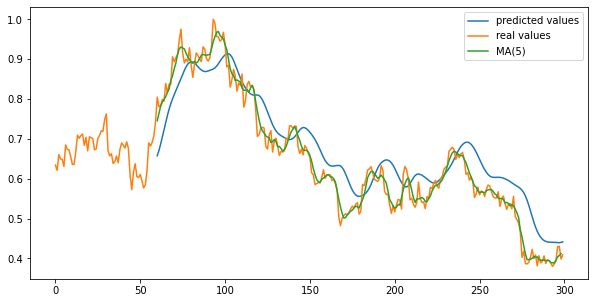

In [24]:
plt.figure(figsize=(10,5))
plt.plot(range(60, 300), predicted_price, label='predicted values')
plt.plot(range(300), testing_set_scaled, label='real values')
plt.plot(range(60, 299),ma_check.loc[61:300,'MA(5)'], label='MA(5)')
plt.legend()
plt.show()

In [25]:
# perform the same but with more epochs and batch size
train_results = regressor.fit(X_train, y_train, epochs=100, batch_size=64)
predicted_price_2 = regressor.predict(X_test)

Epoch 1/100
10/10 [==============================] - 6s 99ms/step - loss: 0.0032
Epoch 2/100
10/10 [==============================] - 1s 97ms/step - loss: 0.0032
Epoch 3/100
10/10 [==============================] - 1s 101ms/step - loss: 0.0030
Epoch 4/100
10/10 [==============================] - 1s 98ms/step - loss: 0.0033
Epoch 5/100
10/10 [==============================] - 1s 94ms/step - loss: 0.0028
Epoch 6/100
10/10 [==============================] - 1s 95ms/step - loss: 0.0027
Epoch 7/100
10/10 [==============================] - 1s 94ms/step - loss: 0.0033
Epoch 8/100
10/10 [==============================] - 1s 97ms/step - loss: 0.0031
Epoch 9/100
10/10 [==============================] - 1s 101ms/step - loss: 0.0029
Epoch 10/100
10/10 [==============================] - 1s 97ms/step - loss: 0.0032
Epoch 11/100
10/10 [==============================] - 1s 92ms/step - loss: 0.0024
Epoch 12/100
10/10 [==============================] - 1s 87ms/step - loss: 0.0027
Epoch 13/100
10/10 [===

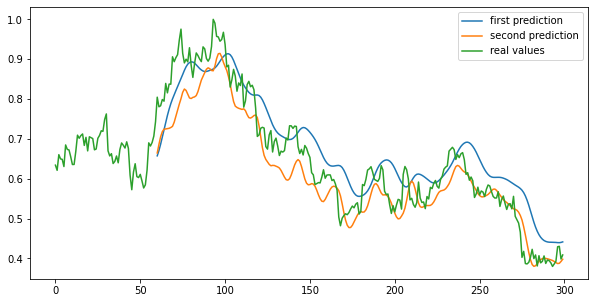

In [26]:
plt.figure(figsize=(10,5))
plt.plot(range(60, 300), predicted_price, label='first prediction')
plt.plot(range(60, 300), predicted_price_2, label='second prediction')
plt.plot(range(300), testing_set_scaled, label='real values')
plt.legend()
plt.show()